## Import Libraries

In [90]:
import os
output2_dir = "../Data/AnalyzedData"
plot_dir = "../Plots"
os.makedirs(output2_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates



## Import Data

In [91]:
data = pd.read_csv("../Data/ProcessedData/SeoulBikeData_cleaned.csv")
data

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,0,1


##  Distribution of Rented Bike Count

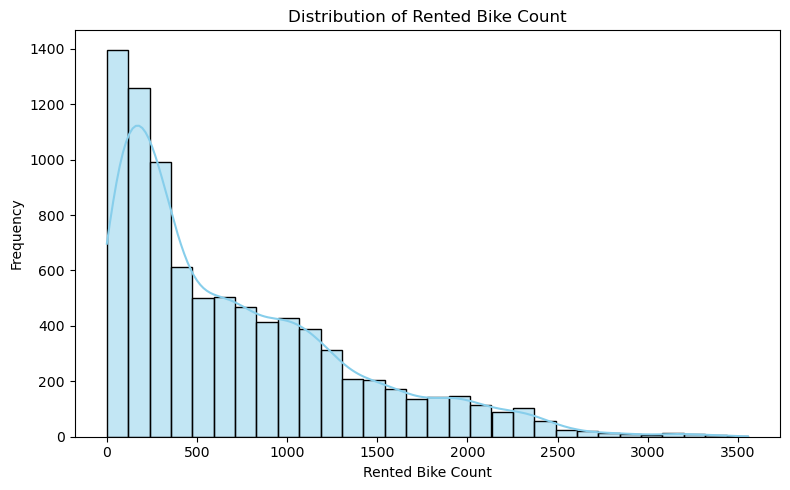

📊 Saved: bike_count_distribution.png


In [ ]:

plt.figure(figsize=(8, 5))
sns.histplot(data['Rented_Bike_Count'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(plot_dir, "bike_count_distribution.png"))
plt.close()
print("📊 Saved: bike_count_distribution.png")

## Detect and Handle Outliers (Wind Speed)

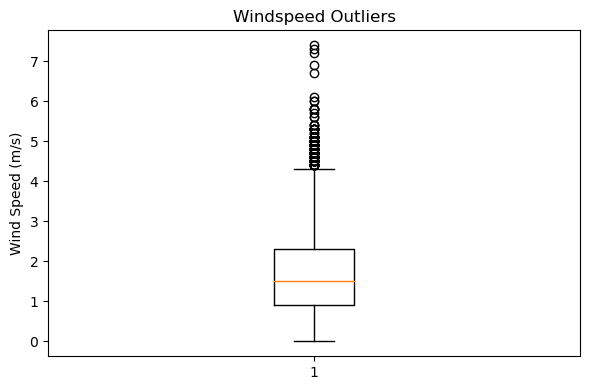

📊 Saved: windspeed_outliers.png
✅ No extreme outliers detected in Wind_speed.


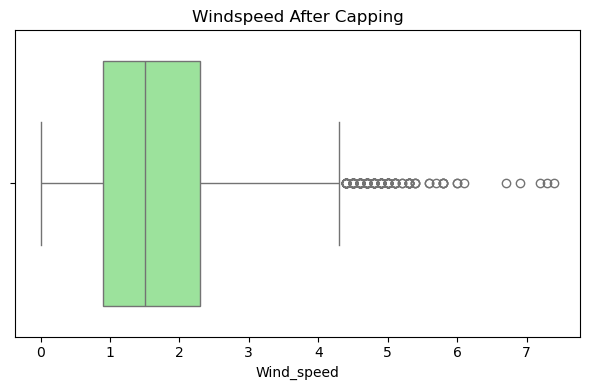

📊 Saved: windspeed_after_capping.png


In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['Wind_speed'])
plt.title('Windspeed Outliers')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(plot_dir, "windspeed_outliers.png"))
plt.close()
print("📊 Saved: windspeed_outliers.png")

# Cap windspeed at a reasonable threshold ( 40 m/s)
max_threshold = 40
original_max = data['Wind_speed'].max()

if original_max > max_threshold:
    data['Wind_speed'] = data['Wind_speed'].clip(upper=max_threshold)
    print(f"⚙️ Windspeed values capped at {max_threshold} m/s (original max = {original_max:.2f})")
else:
    print("✅ No extreme outliers detected in Wind_speed.")

#  visualize post-capping
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Wind_speed'], color='lightgreen')
plt.title('Windspeed After Capping')
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(plot_dir, "windspeed_after_capping.png"))
plt.close()
print("📊 Saved: windspeed_after_capping.png")


## Boxplot – Detect Outliers in Rented Bike Count

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=data['Rented_Bike_Count'], color='skyblue')
plt.title('Boxplot of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(plot_dir, "rented_bike_count_boxplot.png"))
plt.close()
print("📊 Saved: rented_bike_count_boxplot.png")


📊 Saved: rented_bike_count_boxplot.png


## Time Series Trend Visualization

C:\Users\bcs\AppData\Local\Temp\ipykernel_15896\4046597683.py:31: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\bcs\AppData\Local\Temp\ipykernel_15896\4046597683.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig(os.path.join(plot_dir, "time_series_rented_bikes.png"))
C:\Users\bcs\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


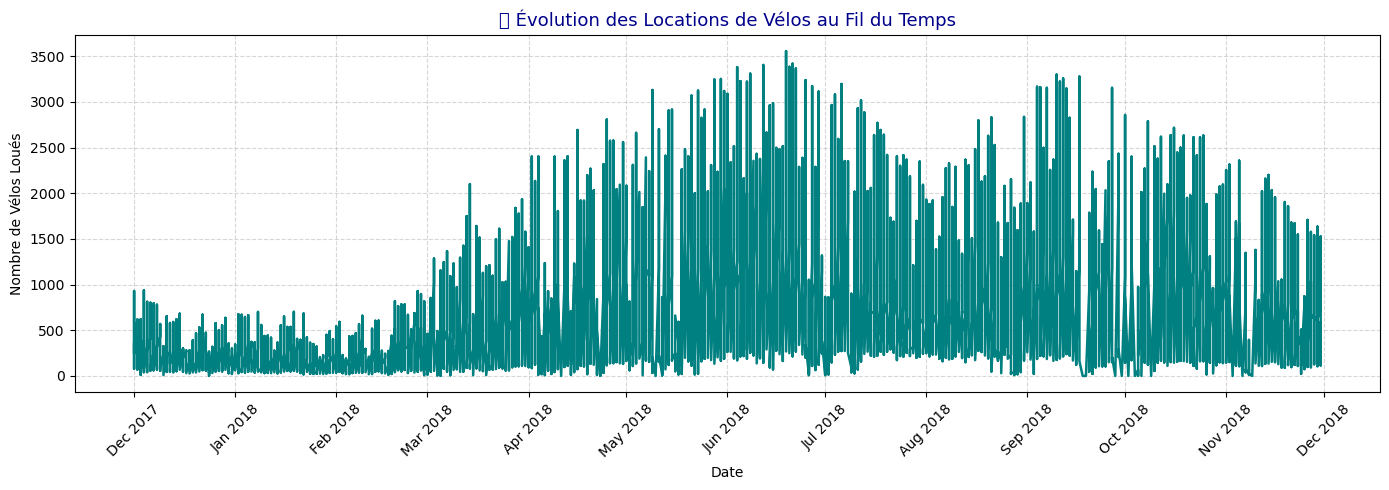

📊 Saved: time_series_rented_bikes.png


In [ ]:
data2 = data.copy()

# Ensure the 'Date' column is in datetime format
data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce')

# Sort values by Date (important for time series)
data2 = data2.sort_values(by='Date')
data2.set_index('Date', inplace=True)

plt.figure(figsize=(14, 5))
plt.plot(data2.index, data2['Rented_Bike_Count'], color='teal', linewidth=1.8)

# Format the date display
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.title('📈 Évolution des Locations de Vélos au Fil du Temps', fontsize=13, color='darkblue')
plt.xlabel('Date')
plt.ylabel('Nombre de Vélos Loués')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "time_series_rented_bikes.png"))
plt.show()

print("📊 Saved: time_series_rented_bikes.png")


##  Average Rentals by Hour of the Day

C:\Users\bcs\AppData\Local\Temp\ipykernel_15896\579570578.py:32: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from current font.
  plt.tight_layout()
C:\Users\bcs\AppData\Local\Temp\ipykernel_15896\579570578.py:33: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from current font.
  plt.savefig(os.path.join(plot_dir, "hourly_rental_trend.png"))
C:\Users\bcs\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


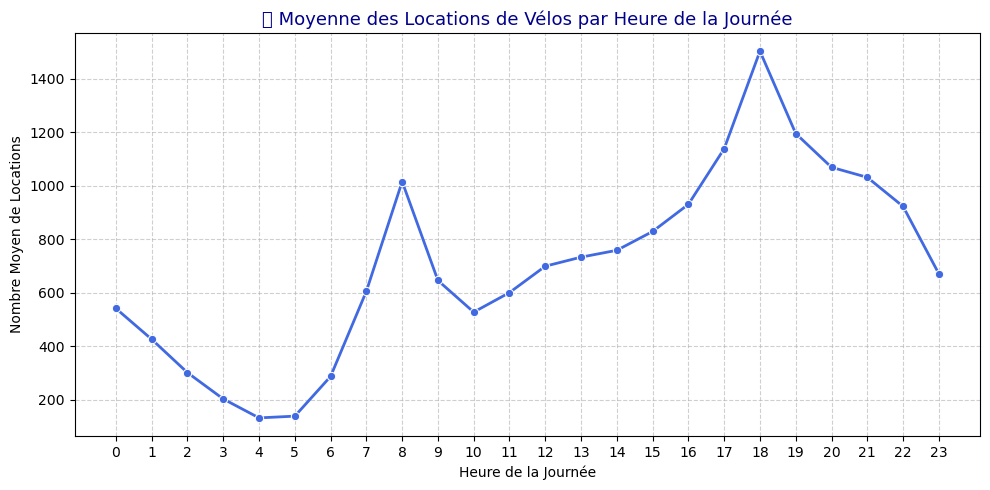

📊 Saved: hourly_rental_trend.png


In [ ]:


# Group by hour and compute mean rentals
hourly_trend = data.groupby('Hour')['Rented_Bike_Count'].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(
    x='Hour',
    y='Rented_Bike_Count',
    data=hourly_trend,
    marker='o',
    color='royalblue',
    linewidth=2
)

plt.title('⏰ Moyenne des Locations de Vélos par Heure de la Journée', fontsize=13, color='darkblue')
plt.xlabel('Heure de la Journée')
plt.ylabel('Nombre Moyen de Locations')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))

# Save figure
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "hourly_rental_trend.png"))
plt.show()

print("📊 Saved: hourly_rental_trend.png")



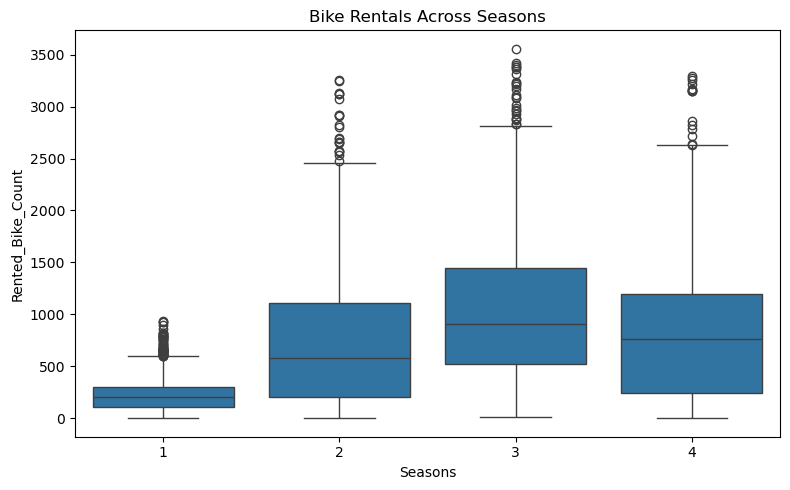

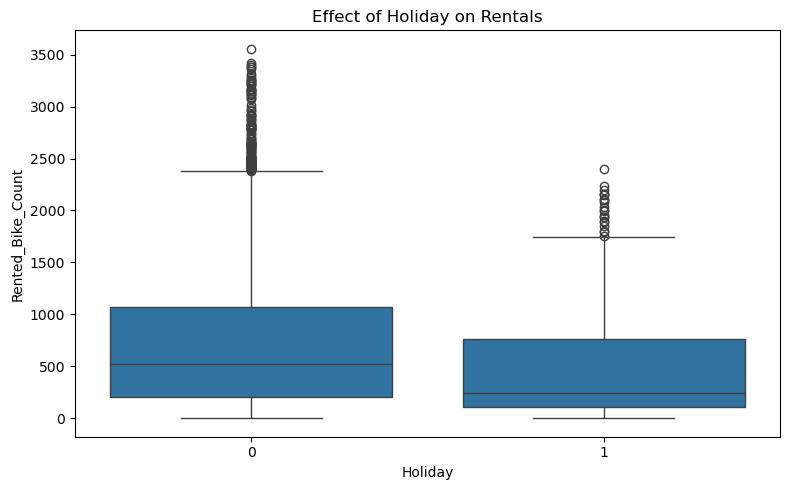

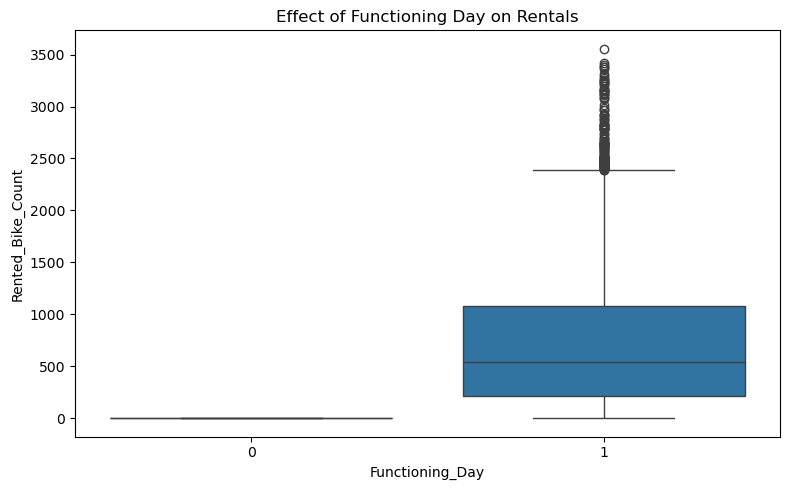

In [ ]:
# Seasonal rentals
plt.figure(figsize=(8,5))
sns.boxplot(x='Seasons', y='Rented_Bike_Count', data=data)
plt.title('Bike Rentals Across Seasons')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "seasonal_rentals.png"))
plt.show()

# Holiday effect
plt.figure(figsize=(8,5))
sns.boxplot(x='Holiday', y='Rented_Bike_Count', data=data)
plt.title('Effect of Holiday on Rentals')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "holiday_effect.png"))
plt.show()

# Functioning Day effect
plt.figure(figsize=(8,5))
sns.boxplot(x='Functioning_Day', y='Rented_Bike_Count', data=data)
plt.title('Effect of Functioning Day on Rentals')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "functioning_day_effect.png"))
plt.show()


## Weather Features - Correlation heatmap
Columns: Temperature, Humidity, Wind speed, Visibility, Dew_point temperature, Solar_Radiation, Rainfall, Snowfall

Purpose: Check correlation with bike rentals and distributions.

C:\Users\bcs\AppData\Local\Temp\ipykernel_15896\697962891.py:24: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()
C:\Users\bcs\AppData\Local\Temp\ipykernel_15896\697962891.py:28: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from current font.
  plt.savefig("../Outputs/Figures/weather_correlation_matrix.png", dpi=300)
C:\Users\bcs\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


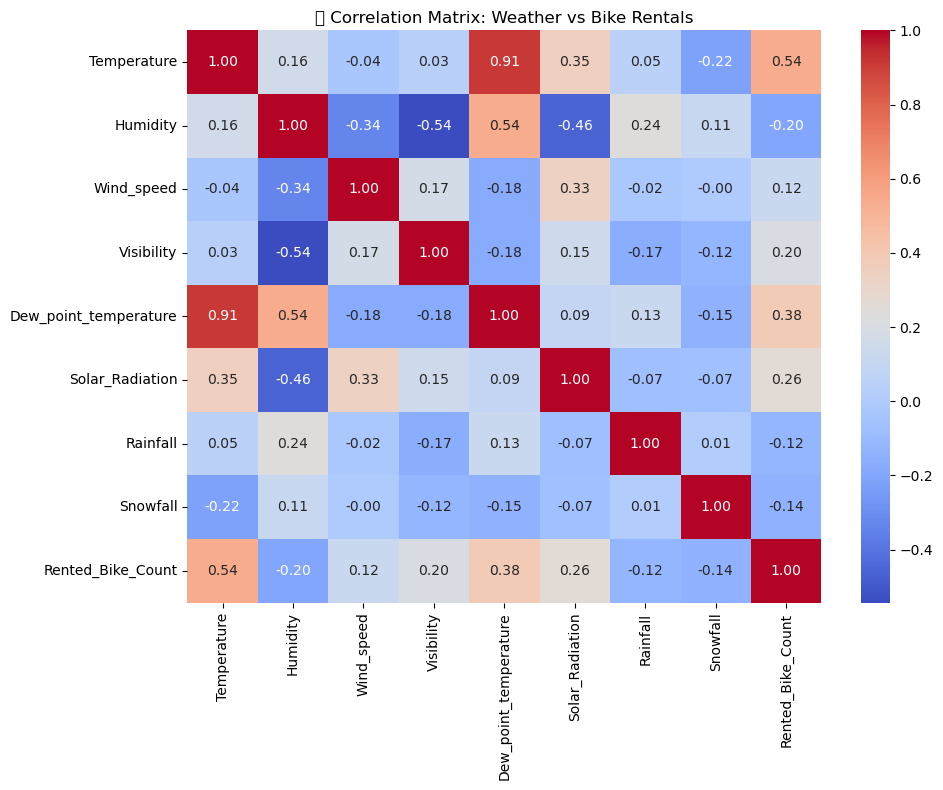

✅ Cleaned data saved successfully at: ../Data/ProcessedData\SeoulBikeData_cleaned.csv
📊 Weather correlation matrix saved at: ../Outputs/Figures/weather_correlation_matrix.png


In [ ]:
weather_cols =[ 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']

plt.figure(figsize=(10, 8))
sns.heatmap(
    data[weather_cols + ['Rented_Bike_Count']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title(' Correlation Matrix: Weather vs Bike Rentals')
plt.tight_layout()

# Save the plot
os.makedirs("../Outputs/Figures", exist_ok=True)
plt.savefig("../Outputs/Figures/weather_correlation_matrix.png", dpi=300)
plt.show()

output_dir = "../Data/ProcessedData"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "SeoulBikeData_cleaned.csv")
data.to_csv(output_file, index=False, encoding='utf-8')

print(f" Cleaned data saved successfully at: {output_file}")
print(" Weather correlation matrix saved at: ../Outputs/Figures/weather_correlation_matrix.png")


# What This Plot Shows

This is a **correlation matrix** showing **Pearson correlation coefficients** between numerical features, including the target variable: **Rented Bike Count**.  

**Correlation values range from -1 to +1:**

- **+1** → Perfect positive correlation  
- **-1** → Perfect negative correlation  
- **0** → No linear correlation  

The **color gradient** helps visualize correlations:  
- **Blue** → Negative correlation  
- **Red** → Positive correlation  

### Key Insights (in simple terms)

- **Warmer, sunnier, and less humid days** lead to **more bike rentals**.  
- **Rain, snow, and higher humidity** reduce bike rentals, although their effects are **less pronounced**.  


## Daily Trending

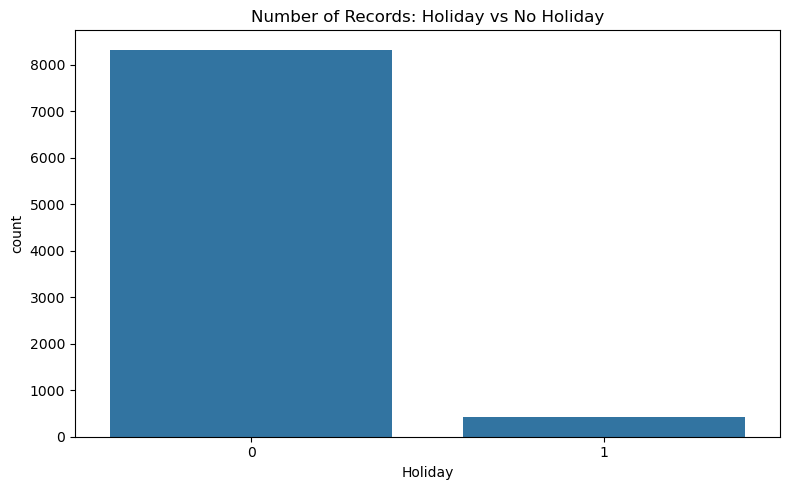

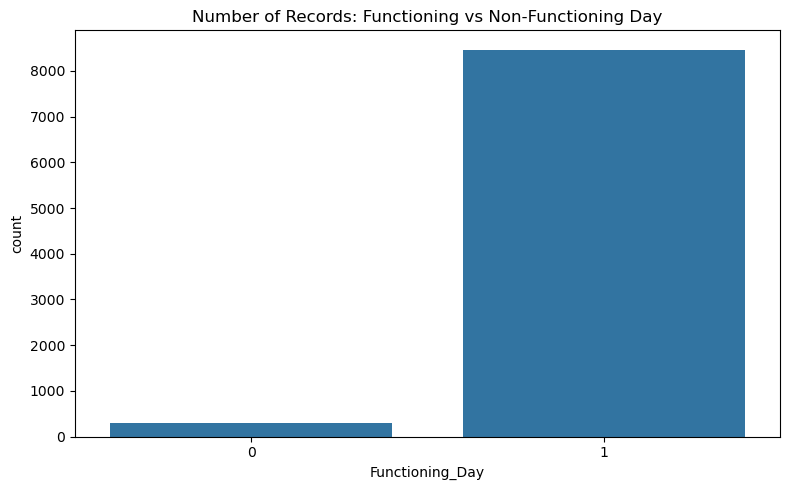

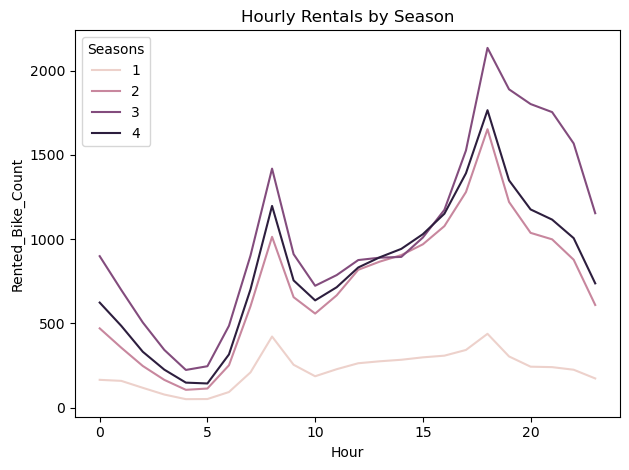

In [99]:


# 1️⃣ Holiday count
plt.figure(figsize=(8,5))
sns.countplot(x='Holiday', data=data)
plt.title('Number of Records: Holiday vs No Holiday')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "holiday_count.png"))
plt.show()

# 2️⃣ Functioning Day count
plt.figure(figsize=(8,5))
sns.countplot(x='Functioning_Day', data=data)
plt.title('Number of Records: Functioning vs Non-Functioning Day')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "functioning_day_count.png"))
plt.show()

# 3️⃣ Hourly Rentals by Season plt.figure(figsize=(10,6)) 
hourly_season_data = data.groupby(['Hour','Seasons'])['Rented_Bike_Count'].mean().reset_index()
sns.lineplot(x='Hour', y='Rented_Bike_Count', hue='Seasons', data=hourly_season_data) 
plt.title('Hourly Rentals by Season')
plt.tight_layout() 
plt.savefig(os.path.join(plot_dir, "hourly_rentals_by_season.png")) 
plt.show()



## Outlier Detection & Capping with IQR

In [ ]:

def cap_outliers_iqr(df, cols=None, factor=1.5):
    """
    Caps outliers for specified numeric columns using the IQR method.
    
    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame to process.
    cols : list
        List of column names to apply outlier capping. If None, all numeric columns are used.
    factor : float
        The multiplier for IQR to define the outlier threshold (default = 1.5).
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with capped values and summary printed.
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR

        # Cap values
        original_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
        
        print(f"✅ {col}: {original_outliers} outliers capped (Range: {round(lower,2)} → {round(upper,2)})")

    return df

# Example: apply to all numeric features
data = cap_outliers_iqr(data)

# Save a before/after plot example
plt.figure(figsize=(7, 4))
sns.boxplot(x=data['Rented_Bike_Count'], color='lightgreen')
plt.title('Boxplot After Outlier Capping (Rented Bike Count)')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "rented_bike_count_boxplot_after_iqr.png"))
plt.close()
print("📊 Saved: rented_bike_count_boxplot_after_iqr.png")


✅ Rented_Bike_Count: 158 outliers capped (Range: -1120.38 → 2376.62)
✅ Hour: 0 outliers capped (Range: -11.5 → 34.5)
✅ Temperature: 0 outliers capped (Range: -25.0 → 51.0)
✅ Humidity: 0 outliers capped (Range: -6.0 → 122.0)
✅ Wind_speed: 161 outliers capped (Range: -1.2 → 4.4)
✅ Visibility: 0 outliers capped (Range: -650.0 → 3590.0)
✅ Dew_point_temperature: 0 outliers capped (Range: -33.95 → 44.05)
✅ Solar_Radiation: 641 outliers capped (Range: -1.4 → 2.33)
✅ Rainfall: 528 outliers capped (Range: 0.0 → 0.0)
✅ Snowfall: 443 outliers capped (Range: 0.0 → 0.0)
✅ Seasons: 0 outliers capped (Range: 0.5 → 4.5)
✅ Holiday: 432 outliers capped (Range: 0.0 → 0.0)
✅ Functioning_Day: 295 outliers capped (Range: 1.0 → 1.0)
📊 Saved: rented_bike_count_boxplot_after_iqr.png


# Feature Engineering

In [101]:
# Create a combined feature for holidays and working days
data['is_Holiday_WorkingDay'] = ((data['Holiday'] == 1) & (data['Functioning_Day'] == 1)).astype(int)

In [102]:
# Create binary weather features
data['is_clear_weather'] = (data['Rainfall'] == 1).astype(int)
data['is_rainy_weather'] = (data['Rainfall'] >= 3).astype(int)
data['is_snowy_weather'] = (data['Snowfall'] > 0).astype(int)

In [ ]:
print(data['Date'].head())
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday
data['DayOfYear'] = data['Date'].dt.dayofyear


0    2017-12-01
1    2017-12-01
2    2017-12-01
3    2017-12-01
4    2017-12-01
Name: Date, dtype: object
0


In [106]:
print(data.columns.tolist())

['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'is_Holiday_WorkingDay', 'is_clear_weather', 'is_rainy_weather', 'is_snowy_weather', 'Month', 'Day', 'Weekday', 'DayOfYear']


In [ ]:
#  Define output file path
output_file = os.path.join(output2_dir, "SeoulBikeData_Analyzed.csv")

# Save the preprocessed dataset
data.to_csv(output_file, index=False, encoding='utf-8')

print(f" Analyzed data saved successfully at: {output_file}")

✅ Analyzed data saved successfully at: ../Data/AnalyzedData\SeoulBikeData_Analyzed.csv
